Step 1: Load and Explore the Dataset
Steps:
Load the dataset into a Pandas DataFrame.

Display the first few rows to get an initial look at the data.

Check data types, column names, and missing values.

Generate summary statistics for numerical columns.

In [ ]:
pip install scipy

In [ ]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency,ttest_ind
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import TargetEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score,recall_score,f1_score,silhouette_score

In [ ]:
path="/content/drive/MyDrive/CASE STUDY  DATA/12.00 CUSTOMER LIFE INS DATA SET.csv"

In [ ]:
df=pd.read_csv(path)

In [ ]:
df.head(2)

,Unnamed: 0,Customer Name,Customer_Address,Company Name,Claim Reason,Data confidentiality,Claim Amount,Category Premium,Premium/Amount Ratio,Claim Request output,BMI,Churn
0,0,Christine Payne,"7627 Anderson Rest Apt. 265,Lake Heather, DC 3...","Williams, Henderson and Perez",Travel,Low,377,4794,0.078640,No,21,Yes
1,1,Tony Fernandez,"3953 Cindy Brook Apt. 147,East Lindatown, TN 4...",Moore-Goodwin,Medical,High,1440,14390,0.100069,No,24,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            200000 non-null  int64  
 1   Customer Name         200000 non-null  object 
 2   Customer_Address      200000 non-null  object 
 3   Company Name          200000 non-null  object 
 4   Claim Reason          200000 non-null  object 
 5   Data confidentiality  200000 non-null  object 
 6   Claim Amount          200000 non-null  int64  
 7   Category Premium      200000 non-null  int64  
 8   Premium/Amount Ratio  200000 non-null  float64
 9   Claim Request output  200000 non-null  object 
 10  BMI                   200000 non-null  int64  
 11  Churn                 200000 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 18.3+ MB


In [ ]:
df.describe(exclude='object')

,Unnamed: 0,Claim Amount,Category Premium,Premium/Amount Ratio,BMI
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,99999.500000,1120.478840,8963.783895,0.125024,23.007205
std,57735.171256,796.660796,6114.737202,0.034742,3.164976
min,0.000000,1.000000,399.000000,0.002506,18.000000
25%,49999.750000,245.000000,1875.000000,0.106741,20.000000
50%,99999.500000,1390.000000,14390.000000,0.125122,23.000000
75%,149999.250000,1844.000000,14390.000000,0.143155,26.000000
max,199999.000000,2299.000000,14390.000000,0.248120,28.000000


In [ ]:
df.describe(include='object')

,Customer Name,Customer_Address,Company Name,Claim Reason,Data confidentiality,Claim Request output,Churn
count,200000,200000,200000,200000,200000,200000,200000
unique,120428,200000,127489,4,4,2,2
top,Michael Smith,"7627 Anderson Rest Apt. 265,Lake Heather, DC 3...",Smith Group,Medical,High,No,Yes
freq,105,1,280,109863,109863,192994,127272


In [ ]:
df.isna().sum().sum()

0

**Step 2: Exploratory Data Analysis (EDA)**
-----------------------------------------
Goals:
Visualize the distribution of the target variable (Churn).

Understand relationships between features and churn.

Check correlations between numerical variables.

Identify patterns or anomalies in the data.


<ipython-input-11-f62a2c15c1ff>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


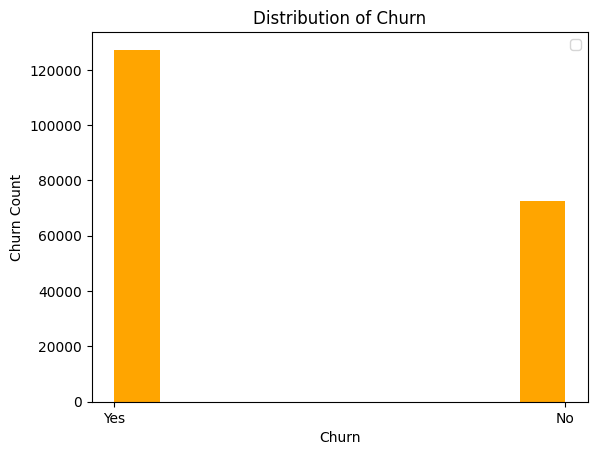

In [ ]:
plt.hist(df.Churn,color='orange')
plt.title("Distribution of Churn")
plt.xlabel("Churn")
plt.ylabel("Churn Count")
plt.legend()
plt.show()

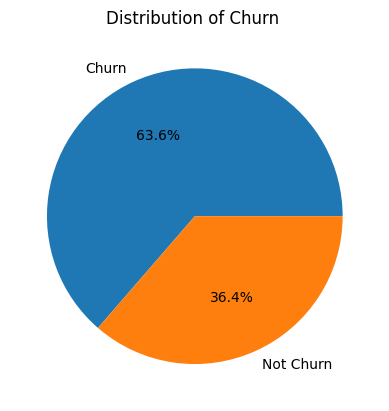

In [ ]:
plt.pie(df.Churn.value_counts(),labels=['Churn','Not Churn'],autopct='%1.1f%%')
plt.title("Distribution of Churn ")
plt.show()

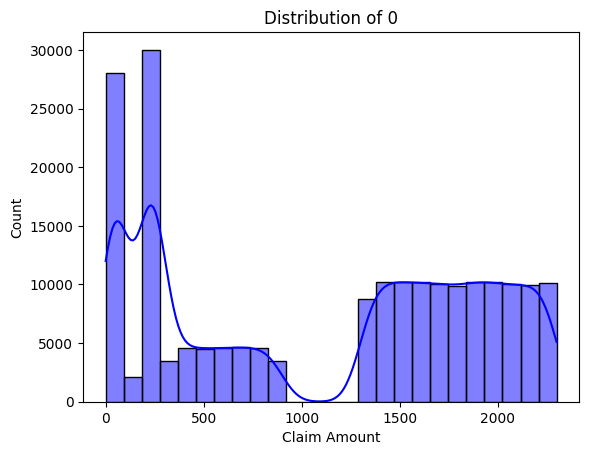

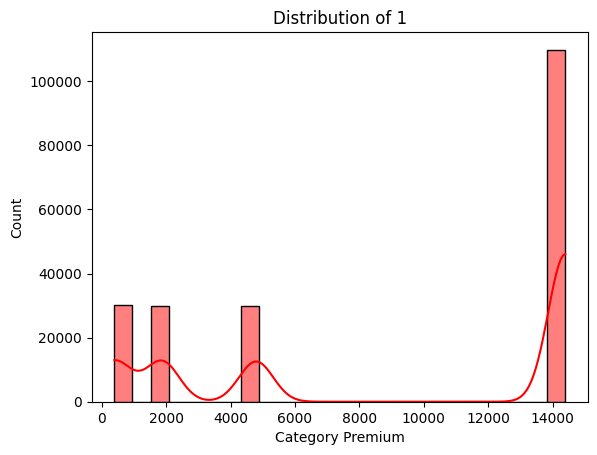

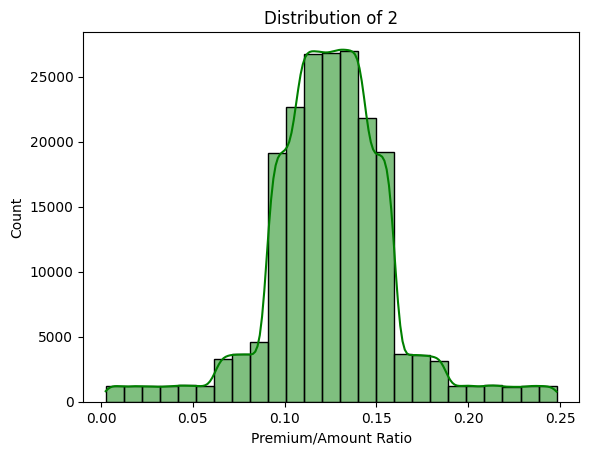

In [ ]:
# Step 2: Check distribution of numerical features
colors=["blue", "red", "green"]
b=['Claim Amount', 'Category Premium','Premium/Amount Ratio']
for i,j in enumerate(b):
  sns.histplot(df[j],kde=True,bins=25,color=colors[i])
  plt.title(f"Distribution of {i}")
  plt.show()

<Axes: >

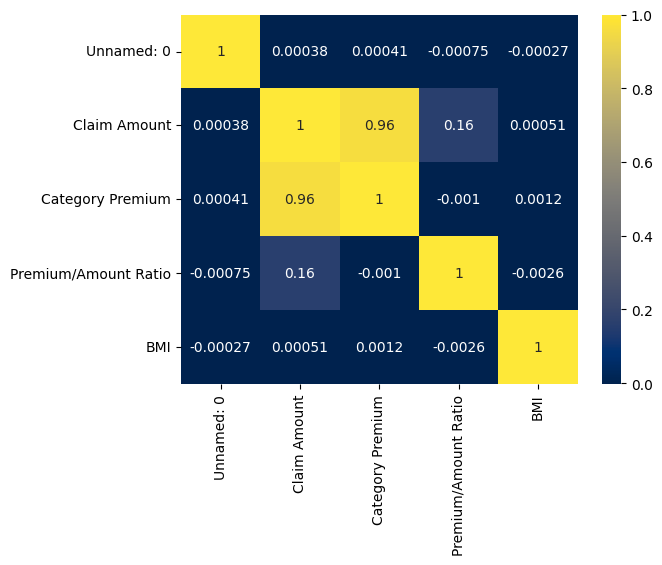

In [ ]:
# Step 3 : Correlation heatmap for numerical features
sns.heatmap(numdf.corr(),annot=True,cmap='cividis')

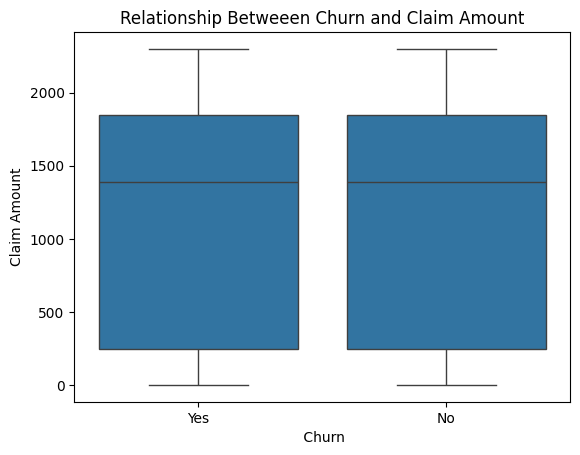

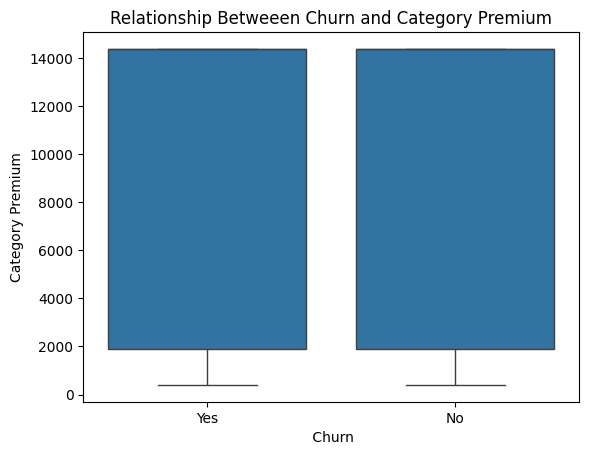

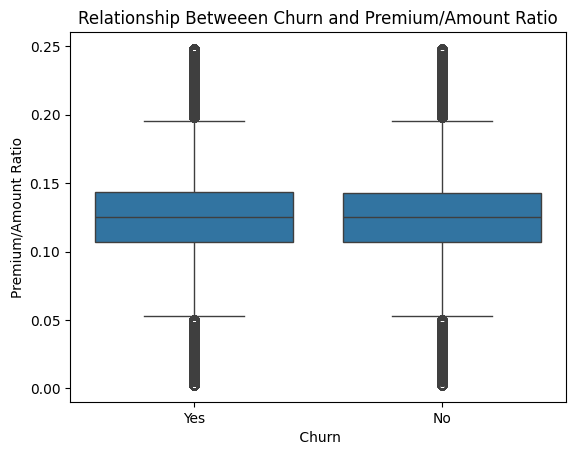

In [ ]:
#Step 4: Boxplots for relationships between numerical features and churn
for i in b:
  sns.boxplot(x=df.Churn,y=df[i])
  plt.title(f"Relationship Betweeen Churn and {i}")
  plt.xlabel(" Churn")
  plt.ylabel(i)
  plt.show()

Step 3: Feature Engineering

Goal: Create new features for better insights.

In [ ]:
#Create a Claim-to-Premium Ratio feature
df['Claim-to-Premium_Ratio']=df['Claim Amount']/df['Category Premium']

In [ ]:
# Example: Categorize BMI into bins
bins=[0,22,24,26,108]
labels=['Young','Middle','Adult','Senior']
df['Status']=pd.cut(df.BMI,bins=bins,labels=labels)
df.head(1)

,Unnamed: 0,Customer Name,Customer_Address,Company Name,Claim Reason,Data confidentiality,Claim Amount,Category Premium,Premium/Amount Ratio,Claim Request output,BMI,Churn,Claim-to-Premium_Ratio,Status
0,0,Christine Payne,"7627 Anderson Rest Apt. 265,Lake Heather, DC 3...","Williams, Henderson and Perez",Travel,Low,377,4794,0.07864,No,21,Yes,0.07864,Young


Step 4: Data Preprocessing

Goal: Handle missing values, encode categorical variables, and scale data.

In [ ]:
#Handle missing values,
df.isna().sum().sum()

0

In [ ]:
# encode categorical variables
from sklearn.preprocessing import LabelEncoder
catmod=LabelEncoder()
df['Data confidentiality']=catmod.fit_transform(df['Data confidentiality'])
df['Claim Reason']=catmod.fit_transform(df['Claim Reason'])

In [ ]:
# Scale numerical features
scaCol=['Claim Amount','Category Premium','Premium/Amount Ratio']
from sklearn.preprocessing import StandardScaler
scal=StandardScaler()
df[scaCol]=scal.fit_transform(df[scaCol])
print("\nPreprocessed Data Sample:")


Preprocessed Data Sample:


Step 5: Hypothesis Testing

Goal: Validate relationships between features and churn.

In [ ]:
from scipy.stats import chi2_contingency,ttest_ind
#  Chi-square test for categorical features
contingency_table=pd.crosstab(df['Status'],df['Churn'])
print(contingency_table)
chie,pvalu,dof,expect=chi2_contingency(contingency_table)
print(f'P value:{pvalu}')

Churn      No    Yes
Status              
Young       0  90476
Middle      0  36796
Adult   36049      0
Senior  36679      0
P value:0.0


In [ ]:
# t-test for numerical features
churned=df[df.Churn=='Yes']['Claim Amount']
NotChurned=df[df.Churn=='No']['Claim Amount']
ttest,pvalue=ttest_ind(churned,NotChurned)
print(f"T Test Pvalue:{pvalue}")
if pvalue < 0.05:
  print(" Total amount and Churn arae Independent ")
else:
   print(" Total amount and Churn arae Dependent ")


T Test Pvalue:0.8192793375732462
 Total amount and Churn arae Dependent 


Step 6: Build and Train a Predictive Model

Goal: Train a machine learning model to predict churn.

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(['Unnamed: 0', 'Customer Name', 'Customer_Address', 'Company Name','Status','Claim Request output','Churn'],axis=1)
y=df.Churn
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
x.head(1)

,Claim Reason,Data confidentiality,Claim Amount,Category Premium,Premium/Amount Ratio,BMI,Claim-to-Premium_Ratio
0,3,1,-0.933246,-0.681925,-1.335127,21,0.07864


In [ ]:
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
ranmod=RandomForestClassifier(random_state=42)
ranmod.fit(xtrain,ytrain)
yp=ranmod.predict(xtest)

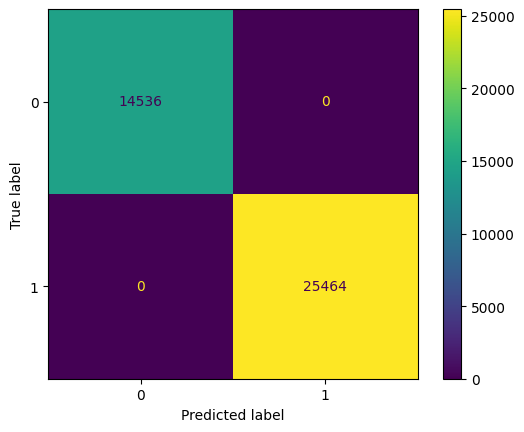

In [ ]:
# Evaluate the Model
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
confusion=confusion_matrix(ytest,yp)
disp=ConfusionMatrixDisplay(confusion_matrix=confusion)
disp.plot()
plt.show()


In [ ]:
print('Classification Reports')
print(f"{classification_report(ytest,yp)}")

Classification Reports
              precision    recall  f1-score   support

          No       1.00      1.00      1.00     14536
         Yes       1.00      1.00      1.00     25464

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000



Step 7: Evaluate Model Performance

Goal: Assess model performance and identify feature importance.

In [ ]:
# Feature Importance
importance=ranmod.feature_importances_
feature_names=x.columns
importance_pd=pd.DataFrame({'Feature':feature_names,'Importance':importance})
importance_pd=importance_pd.sort_values(by='Importance',ascending=False)
print("\nFeature Importance:")
print(importance_pd)


Feature Importance:
                  Feature  Importance
5                     BMI    0.999463
2            Claim Amount    0.000188
6  Claim-to-Premium_Ratio    0.000168
4    Premium/Amount Ratio    0.000156
0            Claim Reason    0.000011
1    Data confidentiality    0.000008
3        Category Premium    0.000007


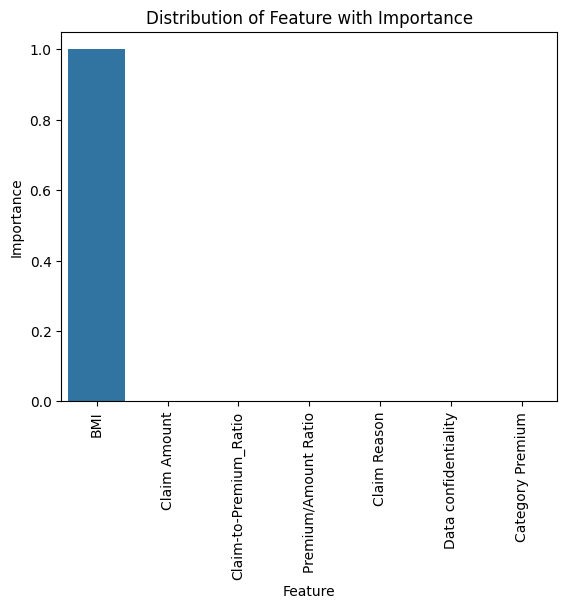

In [ ]:
# Visualize feature importance
sns.barplot(x='Feature',y='Importance',data=importance_pd)
plt.title('Distribution of Feature with Importance')
plt.xticks(rotation=90)
plt.show()